In [78]:
#Importing necesary librabries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [80]:
#importing the dataset
data = pd.read_csv('Dataset_ecommerce.csv', parse_dates =['InvoiceDate'])
data.head()


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [5]:
#Basic EDA for understanding dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# To know the columns and their total number of rows, and the number of missing values, if any
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [9]:
# Dropping all missing values
data = data.dropna(subset= ['CustomerID'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [13]:
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [15]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [17]:
# convert CustomerID from Float to String
data['CustomerID'] = data['CustomerID'].astype(str)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [21]:
#knowledge of the number of customers, transactions, and products in our dataset.
num_customers =data['CustomerID'].nunique()
num_transactions =data['InvoiceNo'].nunique()
num_products =data['StockCode'].nunique()

In [23]:
#knowledge of the number of customers, transactions, and products in our dataset.
print(f'Number of unique customer {num_customers}')
print(f'Number of Transactions {num_transactions}')
print(f'Number of Products {num_products}')

Number of unique customer 4372
Number of Transactions 22190
Number of Products 9000


In [25]:
#Earliest and latest dates for our orders
date_range = (data['InvoiceDate'].min(),data['InvoiceDate'].max())

In [27]:
print(date_range)

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))


In [29]:
print(f'Rows with negative quantity: {(data.Quantity <=0).sum()}')

Rows with negative quantity: 0


In [31]:
print(f'Rows with negative UnitPrice : {(data.UnitPrice <=0).sum()}')

Rows with negative UnitPrice : 0


In [33]:
#countries with the highest ordres
top_countries = data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head()

In [35]:
print(top_countries)

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Name: CustomerID, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7540\3786307212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', legend=False)


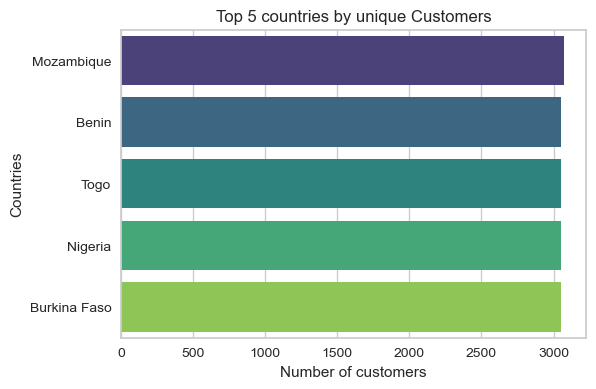

In [428]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', legend=False)
plt.title('Top 5 countries by unique Customers')
plt.xlabel('Number of customers')
plt.ylabel('Countries')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7540\2755972860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', legend=False)


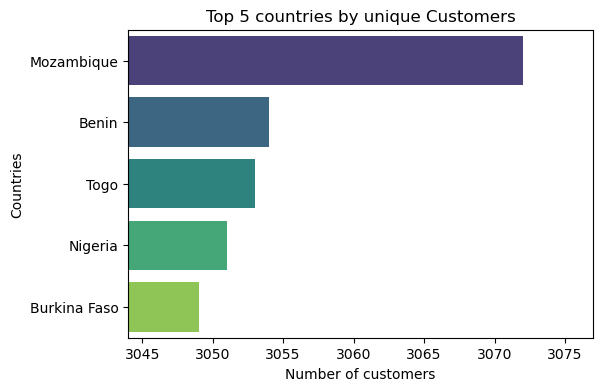

In [37]:
#Adding in plt.xlimit adjustments so the visualisation makes more sense and gives insight in view.
plt.figure(figsize=(6, 4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', legend=False)
plt.xlim(min(top_countries.values)-5, max(top_countries.values) +5)
plt.title('Top 5 countries by unique Customers')
plt.xlabel('Number of customers')
plt.ylabel('Countries')
plt.show()

In [104]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Cohort_Index
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,1.0
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1.0
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,1.0
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,1.0
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1.0


In [106]:
# creating new columns
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')

In [108]:
data['Revenue'] = data['Quantity'] = data['UnitPrice']

In [110]:
#visualisation of new columns
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Cohort_Index,InvoiceMonth,Revenue
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,10.23,10.23,Egypt,1.0,2010-12,10.23
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,19.61,19.61,Mali,1.0,2010-12,19.61
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,61.49,61.49,Mali,1.0,2010-12,61.49
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,24.73,24.73,South Africa,1.0,2010-12,24.73
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,38.83,38.83,Rwanda,1.0,2010-12,38.83


In [112]:
monthly_sales = data.groupby('InvoiceMonth')['Revenue'].sum().reset_index()

In [114]:
monthly_sales['InvoiceMonth']=monthly_sales['InvoiceMonth'].astype(str)

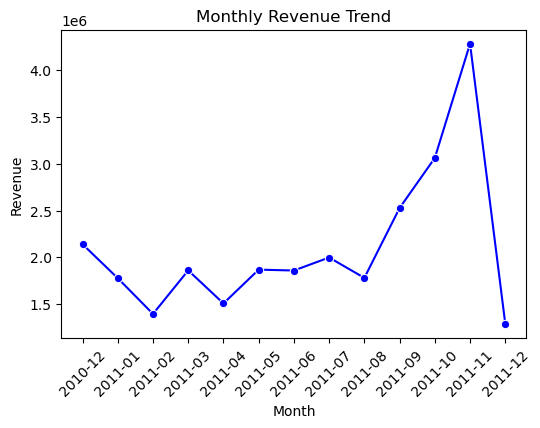

In [116]:
plt.figure(figsize=(6,4))
sns.lineplot(x='InvoiceMonth', y='Revenue', data=monthly_sales, marker='o', color='blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)# this is to slant the values to permit values to display without intersecting
plt.show()

Cohort Analysis

In [119]:
cohort_data= data.groupby('CustomerID')['InvoiceMonth'].min()

In [121]:
cohort_data.name = 'CohortMonth'

In [123]:
cohort_data

CustomerID
12346.0    2011-01
12347.0    2010-12
12348.0    2010-12
12349.0    2011-11
12350.0    2011-02
            ...   
18280.0    2011-03
18281.0    2011-06
18282.0    2011-08
18283.0    2011-01
18287.0    2011-05
Name: CohortMonth, Length: 4372, dtype: period[M]

In [125]:
#merging data
data=data.merge(cohort_data, on='CustomerID')

In [127]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Cohort_Index,InvoiceMonth,Revenue,CohortMonth
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,10.23,10.23,Egypt,1.0,2010-12,10.23,2010-12
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,19.61,19.61,Mali,1.0,2010-12,19.61,2010-12
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,61.49,61.49,Mali,1.0,2010-12,61.49,2010-12
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,24.73,24.73,South Africa,1.0,2010-12,24.73,2010-12
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,38.83,38.83,Rwanda,1.0,2010-12,38.83,2010-12


In [129]:
Invoice_year, Invoice_month = data['InvoiceMonth'].dt.year, data['InvoiceMonth'].dt.month
cohort_year, cohort_month = data['CohortMonth'].dt.year, data['CohortMonth'].dt.month

In [131]:
year_diff = Invoice_year - cohort_year
month_diff = Invoice_month - cohort_month

In [133]:
#cohort_index is the times the customer bought
data['Cohort_Index'] = year_diff * 12 + month_diff + 1
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Cohort_Index,InvoiceMonth,Revenue,CohortMonth
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,10.23,10.23,Egypt,1,2010-12,10.23,2010-12
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,19.61,19.61,Mali,1,2010-12,19.61,2010-12
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,61.49,61.49,Mali,1,2010-12,61.49,2010-12
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,24.73,24.73,South Africa,1,2010-12,24.73,2010-12
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,38.83,38.83,Rwanda,1,2010-12,38.83,2010-12


In [135]:
data.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Cohort_Index,InvoiceMonth,Revenue,CohortMonth
406824,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,36.53,36.53,Mozambique,5,2011-12,36.53,2011-08
406825,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,90.65,90.65,Tunisia,5,2011-12,90.65,2011-08
406826,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,40.07,40.07,Somalia,5,2011-12,40.07,2011-08
406827,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,79.83,79.83,Senegal,5,2011-12,79.83,2011-08
406828,581587,2011-12-09 12:50:00,12680.0,SC9276,Toys,46.62,46.62,Ethiopia,5,2011-12,46.62,2011-08


In [137]:
# Creating the cohort Table
cohort_counts = data.groupby(['CohortMonth', 'Cohort_Index']) ['CustomerID'].nunique().reset_index()

In [139]:
cohort_pivot = cohort_counts.pivot(index= 'CohortMonth', columns= 'Cohort_Index', values='CustomerID')

In [141]:
cohort_pivot

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# Gettinf cohort index to know how many cstomer came back after how long.
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis = 0).round(3)
retention

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


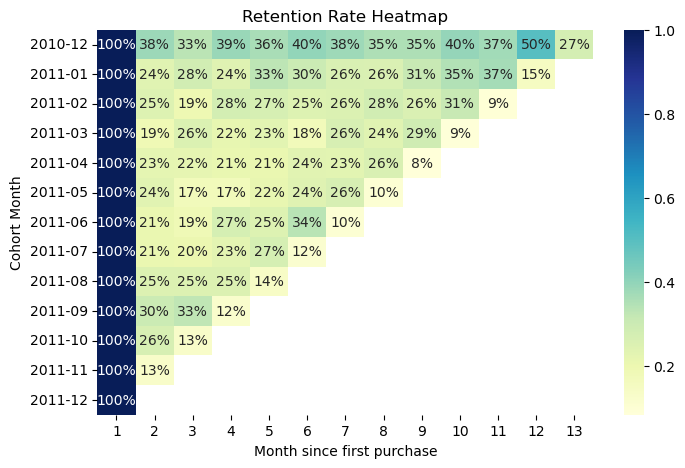

In [145]:
plt.figure(figsize = (8,5))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Retention Rate Heatmap')
plt.xlabel('Month since first purchase')
plt.ylabel('Cohort Month')
plt.show()


In [147]:
[1,2,3,4,5,6,7]

[1, 2, 3, 4, 5, 6, 7]

In [149]:
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [233]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': pd.Series.nunique,
    'Revenue':'sum'
}).reset_index()


In [231]:
data.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country', 'Cohort_Index', 'InvoiceMonth',
       'Revenue', 'CohortMonth'],
      dtype='object')

In [237]:
rfm.describe()
#min recency days shows the most frquent day a customer bought and max shows how long ago the furthers customer bought

,CustomerID,InvoiceDate,InvoiceNo,Revenue
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.047118,5.075480,4697.111972
std,1722.390705,100.765435,9.338754,11718.275904
min,12346.000000,1.000000,1.000000,2.480000
25%,13812.750000,17.000000,1.000000,876.077500
50%,15300.500000,50.000000,3.000000,2098.270000
75%,16778.250000,143.000000,5.000000,5136.147500
max,18287.000000,374.000000,248.000000,399435.760000


In [272]:
# creating new columns
rfm.columns = ['CustomerID', 'recency_days', 'frequency', 'monetary']

In [278]:
rfm.columns

Index(['CustomerID', 'recency_days', 'frequency', 'monetary'], dtype='object')

In [410]:
X = rfm[['recency_days', 'frequency', 'monetary']].copy()

In [412]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [420]:
mm = MinMaxScaler()

In [422]:
X_scaled= mm.fit_transform(X)

In [290]:
#standizing then and putting everthing on the same scale
X_scaled[:5]

array([[ 2.32202285, -0.32936215, -0.39218633],
       [-0.89373323,  0.20610242,  0.36739367],
       [-0.1691956 , -0.11517632, -0.25512404],
       [-0.72500529, -0.43645506, -0.06983327],
       [ 2.16322008, -0.43645506, -0.32289688]])

In [243]:
type(rfm)
rfm.head()

,CustomerID,InvoiceDate,InvoiceNo,Revenue
0,12346.0,326,2,101.89
1,12347.0,2,7,9001.84
2,12348.0,75,4,1707.84
3,12349.0,19,1,3878.88
4,12350.0,310,1,913.75


In [302]:
from sklearn.cluster import KMeans

In [294]:
from sklearn.metrics import silhouette_score

In [336]:
inertia = []
s_score = []
k_range = range (2,11)

In [338]:
#random states makes sures the model give the same 42 every time even if data is added
for k in k_range:
    km =KMeans(n_clusters = k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    s_score.append(silhouette_score(X_scaled, labels))

Text(0, 0.5, 'Inertia')

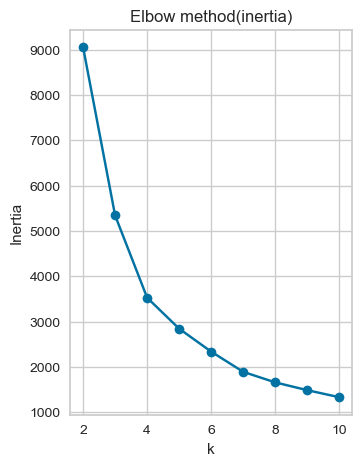

In [426]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(list(k_range), inertia, marker='o')
plt.title('Elbow method(inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')

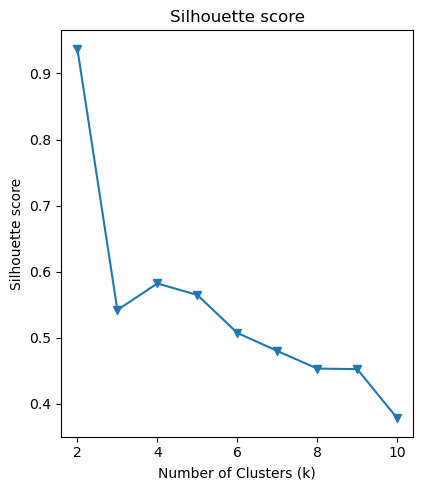

In [348]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,2)
plt.plot(k_range, s_score, marker='v')
plt.title('Silhouette score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette score')
plt.tight_layout()
plt.show()

In [355]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 325.1 kB/s eta 0:00:01
   ------- ------------------------------- 51.2/282.6 kB 290.5 kB/s eta 0:00:01
   -------------------- ----------------- 153.6/282.6 kB 833.5 kB/s eta 0:00:01
   ---------------------------------------  276.5/282.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [356]:
#se  to know the number of clusters to use used automatically
from yellowbrick.cluster import KElbowVisualizer

In [359]:
model = KMeans(random_state=42)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

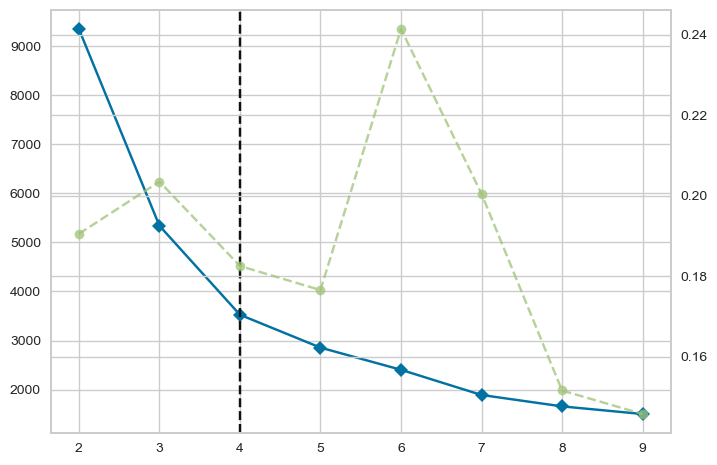

In [363]:
v = KElbowVisualizer(model,k=(2,10))
v.fit(X_scaled)

In [367]:
final_k = 4
final_model = KMeans(n_clusters=final_k, random_state=42)

In [369]:
final_model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [371]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,12346.0,326,2,101.89
1,12347.0,2,7,9001.84
2,12348.0,75,4,1707.84
3,12349.0,19,1,3878.88
4,12350.0,310,1,913.75


In [373]:
rfm['cluster']= final_model.labels_

In [375]:
rfm.head()

,CustomerID,recency_days,frequency,monetary,cluster
0,12346.0,326,2,101.89,1
1,12347.0,2,7,9001.84,0
2,12348.0,75,4,1707.84,0
3,12349.0,19,1,3878.88,0
4,12350.0,310,1,913.75,1


Creating a Cluster Profile

In [384]:
cluster_profile = rfm.groupby('cluster').agg({
    'recency_days':'mean',
    'frequency': 'mean',
    'monetary':'mean',
    'CustomerID':'count'
}).rename(columns= {'CustomerID': 'NumCustomers'}).round(1)

In [386]:
cluster_profile

,recency_days,frequency,monetary,NumCustomers
cluster,,,,
0,43.3,4.2,3875.3,3023
1,248.8,1.8,1375.8,1078
2,1.7,153.5,242999.2,6
3,11.9,25.4,22186.7,265


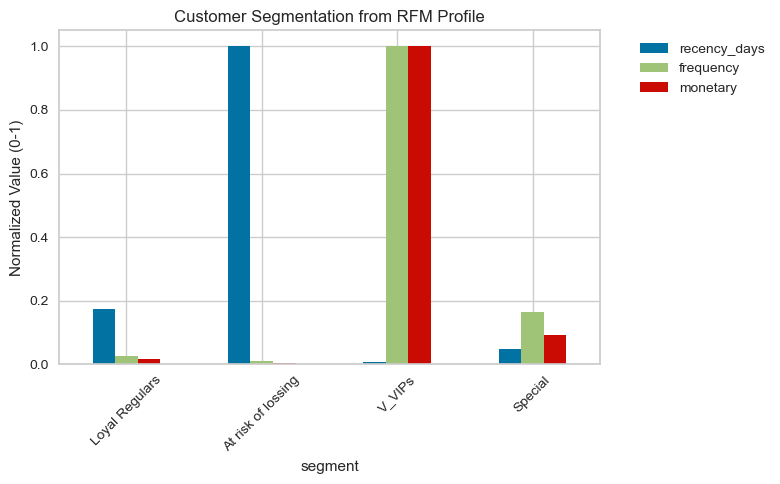

In [430]:
Cluster_names = {
    0: "Loyal Regulars",
    1: "At risk of lossing",
    2: "V_VIPs",
    3: "Special"
}

cluster_profile['segment'] = cluster_profile.index.map(Cluster_names)

data_plot = cluster_profile.copy()
data_plot[['recency_days', 'frequency','monetary']] = (
    data_plot[['recency_days', 'frequency','monetary']]
    .apply(lambda x:x/x.max())
)

data_plot.set_index('segment')[['recency_days', 'frequency','monetary']].plot(
    kind='bar', figsize=(8,5)
)
plt.title('Customer Segmentation from RFM Profile')
plt.ylabel('Normalized Value (0-1)')
plt.xticks(rotation=45)
plt.legend(['recency_days', 'frequency','monetary'], bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

In [406]:
#knowing the individuals in our V VIPs cluster
V_VIPs = rfm[rfm['cluster']==2].copy()

In [408]:
V_VIPs

,CustomerID,recency_days,frequency,monetary,cluster
330,12748.0,1,224,233826.14,2
1300,14096.0,4,34,259203.56,2
1674,14606.0,1,128,141599.19,2
1895,14911.0,1,248,299482.10,2
2192,15311.0,1,118,124448.45,2
4042,17841.0,2,169,399435.76,2
